# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



1. For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.


### Data Validation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("food_claims_2212.csv")
pd.set_option('display.max_columns', None)
print(df.head(15))

    claim_id  time_to_close claim_amount  amount_paid   location  \
0          1            317  R$ 74474.55     51231.37     RECIFE   
1          2            195  R$ 52137.83     42111.30  FORTALEZA   
2          3            183   R$ 24447.2     23986.30   SAO LUIS   
3          4            186  R$ 29006.28     27942.72  FORTALEZA   
4          5            138   R$ 19520.6     16251.06     RECIFE   
5          6            183  R$ 47529.14     38011.98      NATAL   
6          7            190  R$ 39073.26     29826.04   SAO LUIS   
7          8            183  R$ 29870.56     29727.52   SAO LUIS   
8          9            149  R$ 26644.46     23362.14     RECIFE   
9         10            149  R$ 11544.68      9680.82      NATAL   
10        11            180   R$ 31002.6     27110.18   SAO LUIS   
11        12            208  R$ 29802.86     26505.06   SAO LUIS   
12        13            175  R$ 23831.65     17145.09   SAO LUIS   
13        14            223  R$ 42626.53     310

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [ ]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


#### claim_id

Nominal. The unique identifier of the claim.

Missing values are not possible due to the database structure.

In [ ]:
#Unique identifier

df['claim_id'].unique()

array([   1,    2,    3, ..., 1998, 1999, 2000])

In [ ]:
#No duplicates

duplicates = df[df.duplicated('claim_id')]
duplicates

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause


In [ ]:
#No missing values

df['claim_id'].isnull().sum()

0

#### time_to_close

Discrete. The number of days to close the claim. Any positive value.


Replace missing values with the overall median time to close.

In [ ]:
#Any positive value

positive_values_only = (df['time_to_close'] > 0).all()

if positive_values_only:
    print("positive_values_only")
else:
    print("No_positive_values_only")

positive_values_only


In [ ]:
# No missing values

df['time_to_close'].isnull().sum()

0

#### claim_amount

Continuous. The initial claim requested in the currency of Brazil, rounded to 2 decimal places.

Replace missing values with the overall median claim amount

In [ ]:
#Deleting the symbol R$
df['claim_amount'] = df['claim_amount'].str[2:]
df['claim_amount']

0        74474.55
1        52137.83
2         24447.2
3        29006.28
4         19520.6
          ...    
1995      28982.3
1996      5188.44
1997     11975.85
1998     23516.28
1999       8051.4
Name: claim_amount, Length: 2000, dtype: object

In [ ]:
#Rounded to 2 decimal places

df['claim_amount'] = df['claim_amount'].astype(float)

df['claim_amount'] = df['claim_amount'].round(2)

df['claim_amount']

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

In [ ]:
# No missing values

df['claim_amount'].isnull().sum()

0

#### amount_paid

Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places.


Replace missing values with the overall median amount paid

In [ ]:
#Rounded to 2 decimal places

df['amount_paid'] = df['amount_paid'].astype(float)

df['amount_paid'] = df['amount_paid'].round(2)

df['amount_paid']

0       51231.37
1       42111.30
2       23986.30
3       27942.72
4       16251.06
          ...   
1995    24265.02
1996     4772.77
1997    10087.81
1998    23310.24
1999     6417.92
Name: amount_paid, Length: 2000, dtype: float64

In [ ]:
# Missing values

df['amount_paid'].isnull().sum()

36

In [ ]:
#Replace missing valies with the overall median

df['amount_paid'].fillna(df['amount_paid'].median(), inplace=True)

#No missing values

df['amount_paid'].isnull().sum()

0

#### location

Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”,“FORTALEZA”, or“NATAL”.


Remove missing values.

In [ ]:
#Only 4 locations

df['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

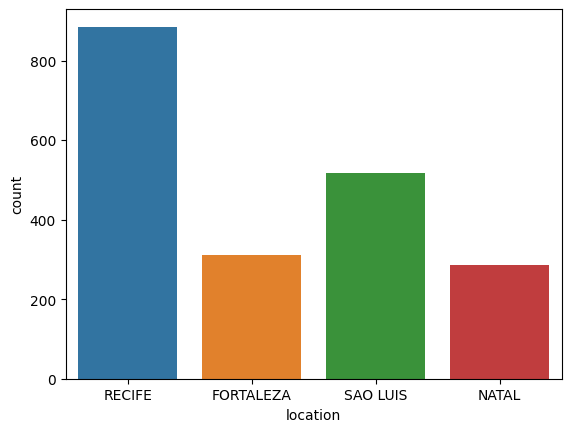

In [ ]:
sns.countplot(x='location', data=df)
plt.show()

In [ ]:
#No missing values

df['location'].isnull().sum()


0

#### individuals_on_claim

Discrete. Number of individuals on this claim. Minimum 1 person.


Replace missing value with 0.


In [ ]:
#No less than 0 values

df['individuals_on_claim'].unique()

array([15, 12, 10, 11,  8,  9,  6,  7, 13,  4,  2,  3, 14,  5,  1])

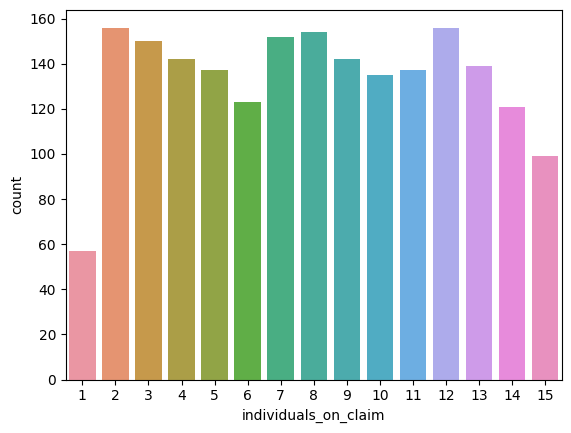

In [ ]:
#Minimum 1 person

sns.countplot(x='individuals_on_claim', data=df)
plt.show()

In [ ]:
#No missing values

df['individuals_on_claim'].isnull().sum()


0

#### linked_cases

Nominal. Whether this claim is linked to other cases. Either TRUE or
FALSE.


Replace missing values with FALSE.

In [ ]:
#Missing values

df['linked_cases'].isnull().sum()


26

In [ ]:
#Replacing missing values with FALSE

df['linked_cases'] = df['linked_cases'].fillna(False).astype(bool)

In [ ]:
df['linked_cases'].unique()

array([False,  True])

In [ ]:
#No missing values

df['linked_cases'].isnull().sum()

0

#### cause

Nominal. Cause of the food poisoning. One of “vegetable”, “meat”
or “unknown”.


Replace missing values with ‘unknown’.

In [ ]:
#Not unique values

df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [ ]:
#Leaving only one of “vegetable”, “meat” or “unknown”.

df['cause'] = df['cause'].replace({' Meat':'meat','VEGETABLES':'vegetable'})

In [ ]:
#Unique values

df['cause'].unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

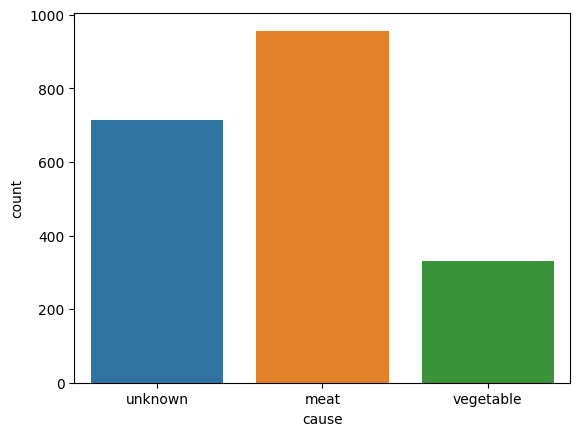

In [ ]:
sns.countplot(x='cause', data=df)
plt.show()

### Confirmation of no missing values



In [ ]:
#No missing values

df.isnull().sum()


claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [ ]:
#No missing values

df.isna().sum()


claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

### Analysis ready data

In [ ]:
print(df.head(15))

    claim_id  time_to_close  claim_amount  amount_paid   location  \
0          1            317      74474.55     51231.37     RECIFE   
1          2            195      52137.83     42111.30  FORTALEZA   
2          3            183      24447.20     23986.30   SAO LUIS   
3          4            186      29006.28     27942.72  FORTALEZA   
4          5            138      19520.60     16251.06     RECIFE   
5          6            183      47529.14     38011.98      NATAL   
6          7            190      39073.26     29826.04   SAO LUIS   
7          8            183      29870.56     29727.52   SAO LUIS   
8          9            149      26644.46     23362.14     RECIFE   
9         10            149      11544.68      9680.82      NATAL   
10        11            180      31002.60     27110.18   SAO LUIS   
11        12            208      29802.86     26505.06   SAO LUIS   
12        13            175      23831.65     17145.09   SAO LUIS   
13        14            223      4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB


In [ ]:
df.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21516.122230,8.049500
std,577.494589,49.16339,16195.783099,12418.285043,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,11106.652500,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30472.895000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


The original data is 2000 rows and 8 columns. The first thing I did was to load the data and create a data frame. I checked the data and write my description of each column according to the data set instructions.

Columns:

- claim_id : Same as description without missing values, 2000 entries.
- time_to_close : Same as description without missing values, not necessary to replace values, all positive numbers.
- claim_amount : Without missing values, replace values R$ in order to convert in float and left only 2 decimals rounded.
- amount_paid : 36 missing values , they were replaced with overall median amount paid.
- location : Same as description without missing values, 4 Unique values ( “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.)
- individuals_on_claim : Same as description without missing values and no 0 values.
- linked_cases : Boolean values 26 missing values unique values (False or True).
- cause : Not missing values but not clean, i replace some values in order to leave only 3 unique values (“vegetable”, “meat” or “unknown”.)

## Task 2

Create a visualization that shows the number of claims in each location. Use the visualization to:

a. State which category of the variable location has the most observations


b. Explain whether the observations are balanced across categories of the variable location



There are four possible locations included in this data, the location with more claims is RECIFE according with the barplot it has more observations. This would suggest that the team should focus on the claims ocurred in RECIFE.


According with the data, the observations are not balanced. A 44.20% of the claims come from RECIFE a big difference in comparison with the other 3 locations.

### Exploratory Analysis

In [ ]:
df_location = df.groupby('location')['claim_id'].count().reset_index()
print(df_location)

    location  claim_id
0  FORTALEZA       311
1      NATAL       287
2     RECIFE       885
3   SAO LUIS       517


<ipython-input-619-79b62d21419d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='claim_id', data=df_location, ci=None)


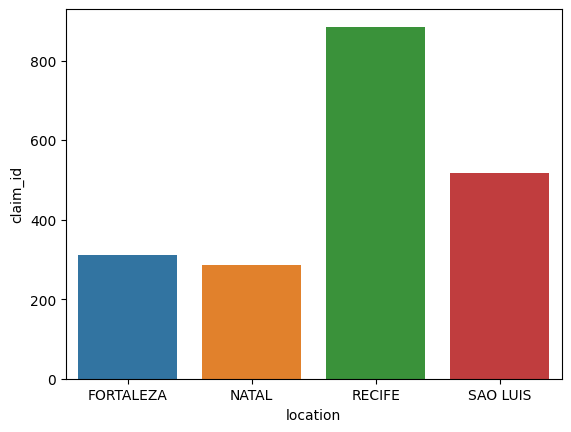

In [ ]:
sns.barplot(x='location', y='claim_id', data=df_location, ci=None)
plt.show()

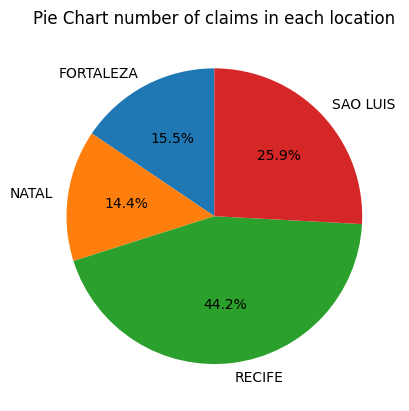

In [ ]:
#Pie Chart
fig, ax = plt.subplots()
ax.pie(df_location['claim_id'], labels=df_location['location'], autopct='%1.1f%%', startangle=90)
ax.set_title("Pie Chart number of claims in each location")
plt.show()

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.


As the legal team thinks the time to close claims it´s important, we should look at how many days takes to close claims is distributed.

Looking at the histogram and the boxplot, we can see that most of the observations have around 185 days.There are some outliers that get more than 500 days but this is very uncommon. The minimum days are 76 and the median is 179.

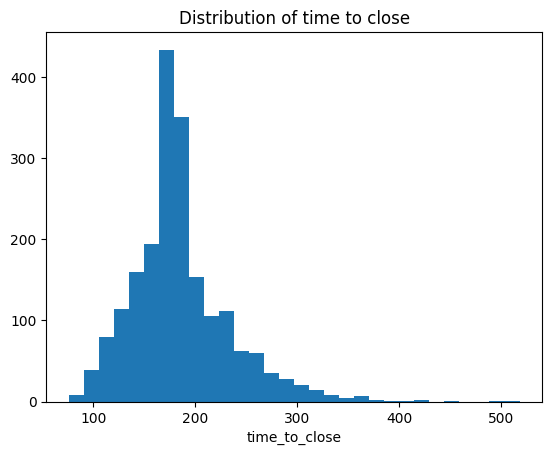

In [ ]:
#Histogram

plt.hist(df['time_to_close'], bins=30)

plt.xlabel('time_to_close')
plt.title('Distribution of time to close')

plt.show()

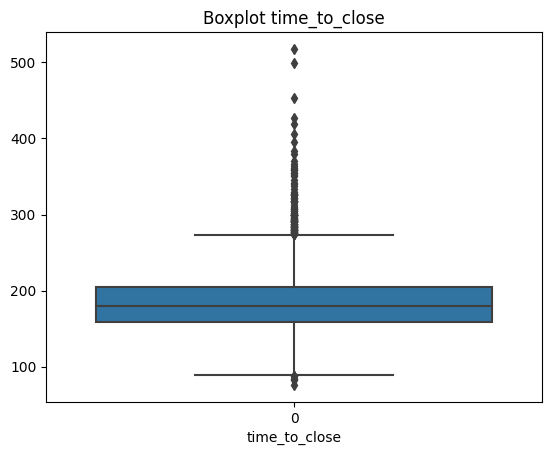

In [ ]:
#BoxPlot

sns.boxplot(data=df['time_to_close'])

plt.xlabel('time_to_close')
plt.title('Boxplot time_to_close')

plt.show()

## Task 4

Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

Finally we combine two pieces of information to see how the location impacts number of days that take to close claims.

So far there is no a big difference between the locations and the time to claim variabe. The four locations have a pretty similar mean and median. In the graphics below you can see that there are some outlier especialy in SAO LUIS and FORTALEZA.

In [ ]:
df_location_time = df.groupby('location')['time_to_close']
df_location_time.describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
FORTALEZA,311.0,185.305466,47.583000,76.0,157.0,180.0,205.5,453.0
NATAL,287.0,185.926829,47.059160,93.0,157.0,179.0,205.5,361.0
RECIFE,885.0,184.607910,48.013254,82.0,157.0,178.0,203.0,427.0
SAO LUIS,517.0,187.170213,53.126094,84.0,161.0,179.0,205.0,518.0


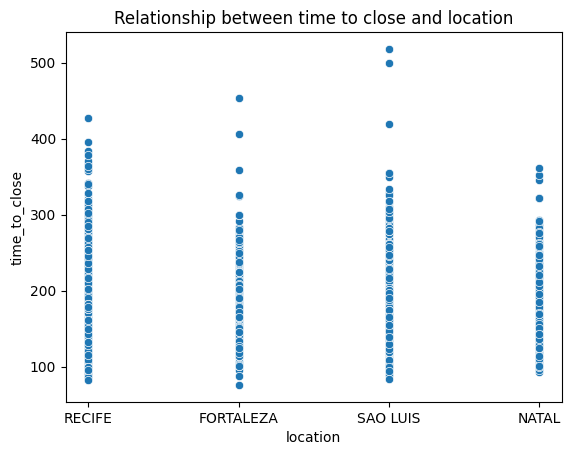

In [ ]:
sns.scatterplot(x='location', y='time_to_close', data=df)

# Agregar etiquetas de eje y título
plt.xlabel('location')
plt.ylabel('time_to_close')
plt.title('Relationship between time to close and location')

# Mostrar el scatterplot
plt.show()

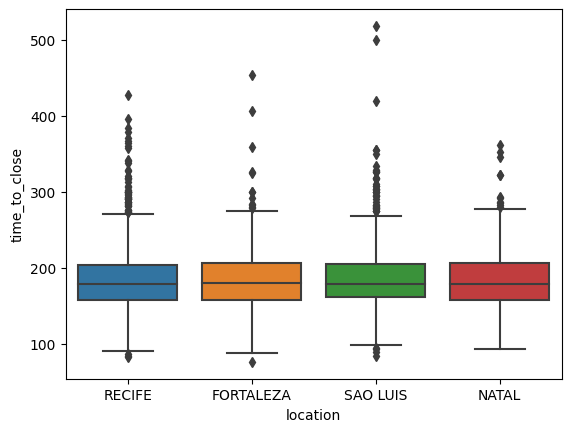

In [ ]:
sns.boxplot(x='location', y='time_to_close', data=df)
plt.show()


Based on all of the above, we would recommend that the leagal team focus on reducing the number of claims in RECIFE and SAO LUIS and take care of those claims that exceed the waiting time but also keeping an eye on those claims that take more than 200 days to be closed.

I could suggest to check in deep the data of the cases that took less time than usual, for example less than 100 days and learn about those cases in order to apply the experience in future claims.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam